# Abalone Dataset

## Goal

 The aim of our case study is to predict whether the number of Rings of Abalone will be “>5” (greater than 5) or not.

![](https://i.imgur.com/EwGZ2nb.png)

## Importing the Libraries

In [1]:
# Import libraries 
import numpy as np # Import Numpy for data statistical analysis 
import pandas as pd  # Import Pandas for data manipulation using dataframes
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
# Import the dataset
abalone = pd.read_csv('abalone.csv',header = None)

In [3]:
# Reassinging the column names
abalone.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"] 

## Exploring the Data 

In [4]:
# First 5 columns
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# data information
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


*We have one categorical variable and eight numerical variables in our dataset.*

In [6]:
# summary of the data
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


* *We can see that the mean length of abalone from the observations in the dataset is 0.52 mm, while the longest is 0.82 mm and the shortest is 0.075 mm.*
* *With the height we get a mininum of 0.0000 which seems to be not right.* 
* *Shell weight seems to not be more than 1 gram.*
* *The heaviest abalone is 2.82 grams and the lightest 0.002 grams.*

In [7]:
# Dimensions of the data
abalone.shape

(4177, 9)

*We have 4177 observations and 9 features in our dataset.*

In [8]:
# Target Class - 'Ring' analysis
print("Value Count of Rings")
print(abalone.Rings.value_counts())
print("\nPercentage of Rings")
print(abalone.Rings.value_counts(normalize = True))

Value Count of Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


In [9]:
# No. of unique classes in target variable
len(abalone.Rings.unique())

28

*We have 28 unique Rings.*

In [10]:
# Sex Ratio in Abalone
print("\nSex Count in Percentage")
print(abalone.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(abalone.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [11]:
# Including only the 'Height' greater than 0
abalone = abalone[ abalone.Height > 0 ]

In [12]:
# Information of the variable
abalone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4175 non-null object
Length            4175 non-null float64
Diameter          4175 non-null float64
Height            4175 non-null float64
Whole weight      4175 non-null float64
Shucked weight    4175 non-null float64
Viscera weight    4175 non-null float64
Shell weight      4175 non-null float64
Rings             4175 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


In [13]:
# Summary Statistics
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Checking Missing Values

In [14]:
# checking missing values
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

*There are no null values in our dataset.*

## Exploratory Data Analysis

### 'Rings'

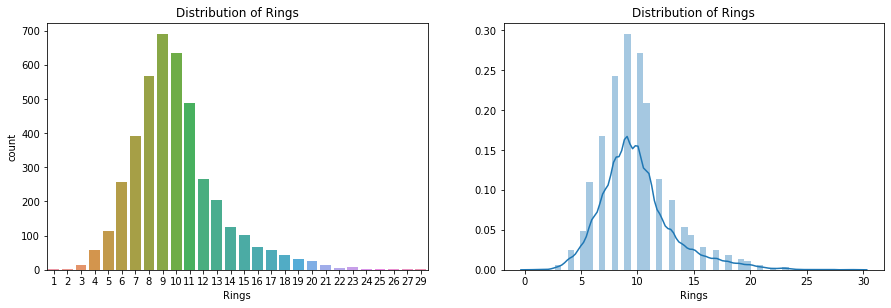

In [15]:
plt.figure(figsize=(15, 10))
# Countplot
plt.subplot(2,2,1)
sns.countplot(abalone.Rings)
plt.title('Distribution of Rings')
# Distplot
plt.subplot(2,2,2)
sns.distplot(abalone.Rings)
plt.title('Distribution of Rings')
plt.show()

* *Frome the above plot, we can say that the Rings after 15 are skewed towards right tail  .*
* *Also, It appears that Abalone with Rings between 8-10 have the most observations.*

### 'Sex'

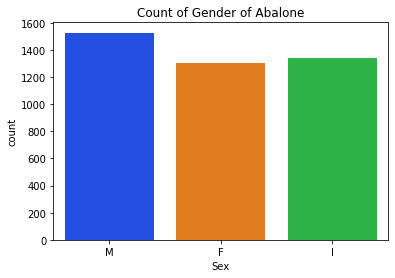

In [16]:
# Countplot for 'Sex'
sns.countplot(abalone['Sex'], palette = 'bright')
plt.title('Count of Gender of Abalone')
plt.show()

*Males are more frequent `Sex`, While Females are the least among all.*

### Correlations

In [17]:
# Correlations of numerical features
numerical_features = abalone.select_dtypes(include  = [np.number])
correlation = numerical_features.corr()
numerical_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


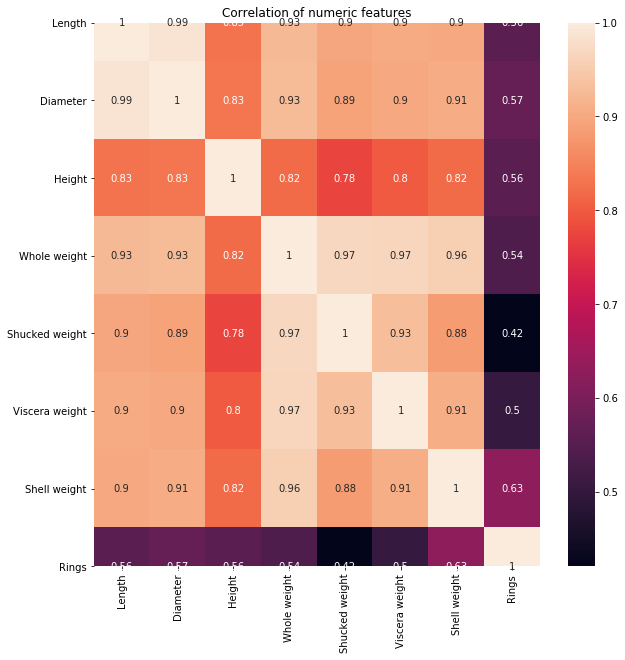

In [18]:
# Correlation Plot
plt.figure(figsize = (10,10))
plt.title('Correlation of numeric features')
sns.heatmap(correlation, annot = True  )
plt.show()

*From the above plot, we can say that `Shell weight` is the only feature that has a high correlation above 0.50 with the target variable `Rings`.*

### Pair Plot

<Figure size 288x144 with 0 Axes>

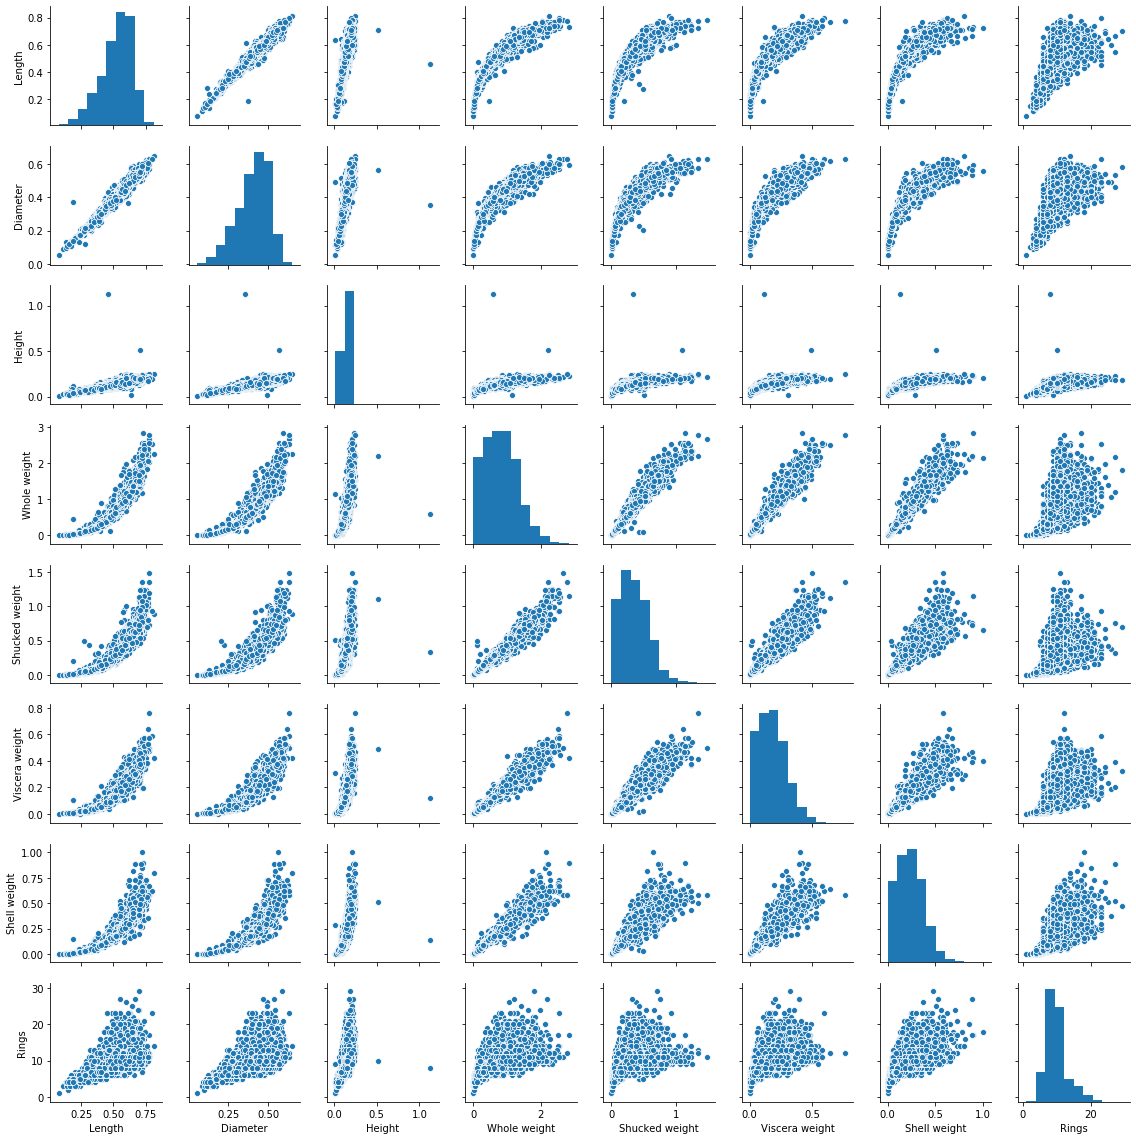

In [19]:
plt.figure(figsize=(4,2))
sns.pairplot(data = numerical_features, size=2,kind='scatter')
plt.show()

*From the above plot, we can say that Length is linearly correlated with Diameter and Height and has a non-linear relation with Whole weight, Shucked weight, Viscera weight and Shell weight.*

### ScatterPlots

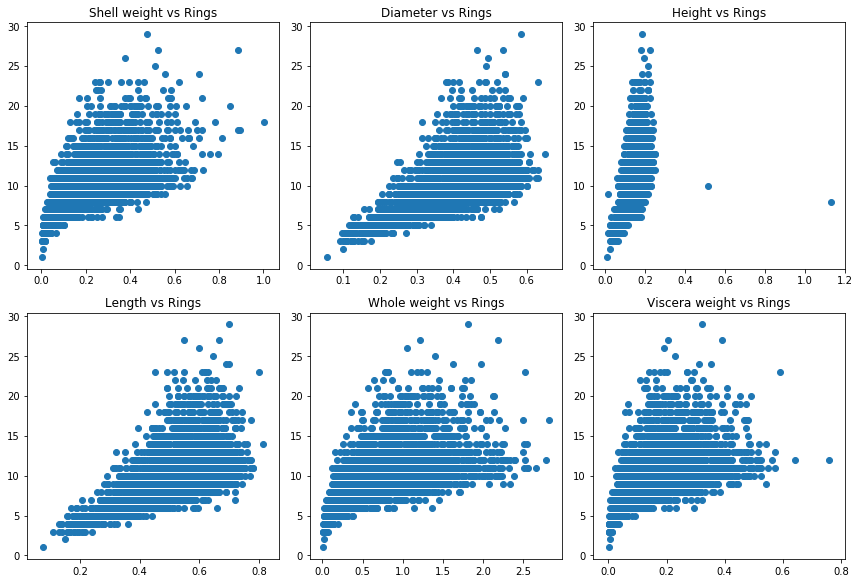

In [20]:
plt.figure(figsize=(12, 12))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(abalone['Shell weight'],abalone['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(abalone['Diameter'],abalone['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(abalone['Height'],abalone['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(abalone['Length'],abalone['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(abalone['Whole weight'],abalone['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(abalone['Viscera weight'],abalone['Rings'])

plt.tight_layout()

*From the above plot, we can clearly see that there are some outliers present for each independent variable and we need to take care of them.*

### Outlier Handling

#### From the EDA it is clear that we will need to Handle the outliers.

In [21]:
# Calculating the IQR(Interquartile Range) of all the numerical variables
Q1 = abalone.quantile(0.25)
Q3 = abalone.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Length            0.16500
Diameter          0.13000
Height            0.05000
Whole weight      0.71125
Shucked weight    0.31575
Viscera weight    0.15950
Shell weight      0.19875
Rings             3.00000
dtype: float64


### Length

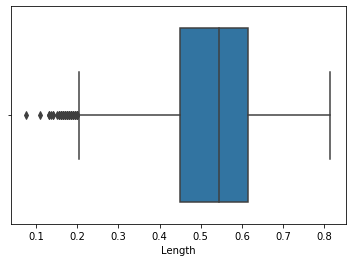

In [22]:
# length
sns.boxplot(x = abalone['Length'],data= abalone)

In [23]:
# Outliers
Length_outliers = ((abalone['Length'] < (Q1['Length'] - 1.5 * IQR['Length'])) |(abalone['Length'] > (Q3['Length'] + 1.5 * IQR['Length'])))
positions_outliers = np.where(Length_outliers)
print(positions_outliers)

(array([ 148,  149,  236,  237,  238,  239,  305,  306,  321,  465,  523,
        525,  526,  611,  694,  696,  718,  719,  720, 1053, 1054, 1055,
       1056, 1210, 1428, 1823, 1985, 1986, 2113, 2114, 2168, 2170, 2342,
       2370, 2379, 2380, 2457, 2710, 3140, 3142, 3189, 3317, 3379, 3471,
       3599, 3836, 3898, 3901, 3993], dtype=int64),)


In [24]:
# Lower bound
lb = Q1['Length'] - 1.5 * IQR['Length']
print(lb)
# Upper bound
ub = Q3['Length'] + 1.5 * IQR['Length']
print(ub)

0.20250000000000004
0.8624999999999999


In [25]:
Len = abalone['Length']

In [26]:
Length_out_pos = Len.iloc[positions_outliers]

In [27]:
# Assigning lower bound values to the outliers
Len.iloc[positions_outliers]= lb

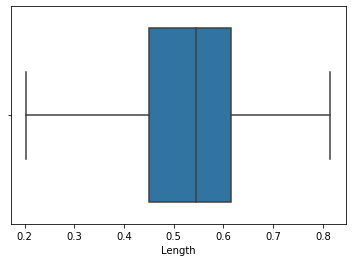

In [28]:
# Without Outliers
sns.boxplot(x = abalone['Length'],data= abalone)

### Diameter

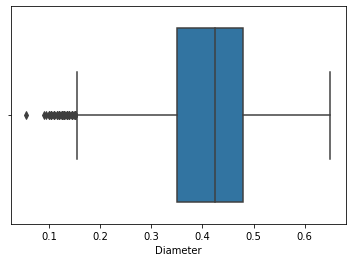

In [29]:
# Diameter
sns.boxplot(x = abalone['Diameter'],data= abalone)

In [30]:
# Outliers
Length_outliers = ((abalone['Diameter'] < (Q1['Diameter'] - 1.5 * IQR['Diameter'])) |(abalone['Diameter'] > (Q3['Diameter'] + 1.5 * IQR['Diameter'])))
positions_outliers = np.where(Length_outliers)
print(positions_outliers)

(array([  43,   44,  148,  149,  236,  237,  238,  239,  305,  306,  321,
        465,  520,  523,  525,  526,  611,  694,  696,  718,  719,  720,
        892,  898, 1053, 1054, 1055, 1428, 1823, 1985, 1986, 1987, 2113,
       2114, 2168, 2170, 2171, 2342, 2370, 2379, 2380, 2457, 2544, 2710,
       2711, 3140, 3142, 3189, 3317, 3379, 3471, 3472, 3520, 3599, 3715,
       3836, 3898, 3901, 3993], dtype=int64),)


In [31]:
# Lower Bound
lb = Q1['Diameter'] - 1.5 * IQR['Diameter']
print(lb)
# Upper Bound
ub = Q3['Diameter'] + 1.5 * IQR['Diameter']
print(ub)

0.15499999999999997
0.675


In [32]:
Dia = abalone['Diameter']

In [33]:
Diameter_out_pos = Dia.iloc[positions_outliers]

In [34]:
# Assigning lower bound values to the outliers
Dia.iloc[positions_outliers]= lb

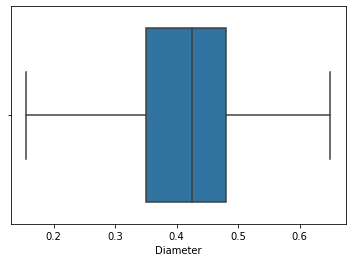

In [35]:
# Without Outliers
sns.boxplot(x = abalone['Diameter'],data= abalone)

### Height

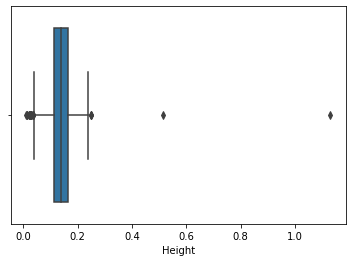

In [36]:
# Height
sns.boxplot(x = abalone['Height'],data= abalone)

In [37]:
# Outliers
Height_outliers = ((abalone['Height'] < (Q1['Height'] - 1.5 * IQR['Height'])) |(abalone['Height'] > (Q3['Height'] + 1.5 * IQR['Height'])))
positions_outliers = np.where(Height_outliers)
print(positions_outliers)

(array([ 236,  237,  238,  239,  306,  694,  718,  719,  720, 1174, 1416,
       1427, 1428, 1762, 1986, 2050, 2113, 2168, 2170, 2171, 2178, 2380,
       2710, 3189, 3836, 3898, 3901], dtype=int64),)


In [38]:
# Lower Bound
lb = Q1['Height'] - 1.5 * IQR['Height']
print(lb)
# Upper Bound
ub = Q3['Height'] + 1.5 * IQR['Height']
print(ub)

0.039999999999999994
0.24000000000000002


In [39]:
Height = abalone['Height']

In [40]:
Height_out_pos = Height.iloc[positions_outliers]

In [41]:
# Assigning lower bound values and upper bound values to the outliers
Height.iloc[positions_outliers]= np.where(Height_out_pos  < 0.039999999999999994, lb , ub)

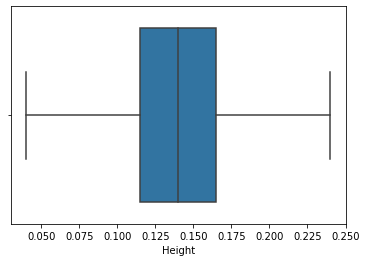

In [42]:
# Without Outliers
sns.boxplot(x = abalone['Height'],data= abalone)

### Whole weight

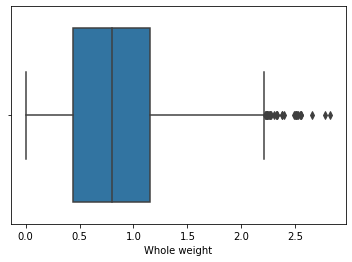

In [43]:
# Whole Weight
sns.boxplot(x = abalone['Whole weight'],data= abalone)

In [44]:
# Outliers
Length_outliers = ((abalone['Whole weight'] < (Q1['Whole weight'] - 1.5 * IQR['Whole weight'])) |(abalone['Whole weight'] > (Q3['Whole weight'] + 1.5 * IQR['Whole weight'])))
positions_outliers = np.where(Length_outliers)
print(positions_outliers)

(array([ 165,  358,  891, 1051, 1052, 1193, 1206, 1207, 1209, 1425, 1426,
       1427, 1760, 1761, 1762, 2264, 2333, 2622, 2623, 2810, 2861, 2862,
       3006, 3007, 3187, 3426, 3598, 3714, 3799, 3992], dtype=int64),)


In [45]:
# Lower Bound
lb = Q1['Whole weight'] - 1.5 * IQR['Whole weight']
print(lb)
# Upper Bound
ub = Q3['Whole weight'] + 1.5 * IQR['Whole weight']
print(ub)

-0.6246250000000002
2.2203750000000007


In [46]:
Whole_weight = abalone['Whole weight']
Whole_weight_out_pos = Whole_weight.iloc[positions_outliers]
# Assigning upper bound values to the outliers
Whole_weight.iloc[positions_outliers]= ub

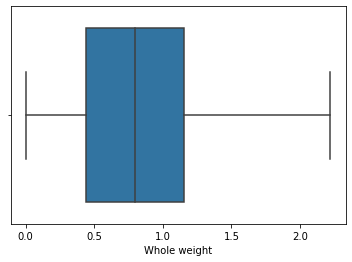

In [47]:
# Without Outliers
sns.boxplot(x = abalone['Whole weight'],data= abalone)

### Shucked weight

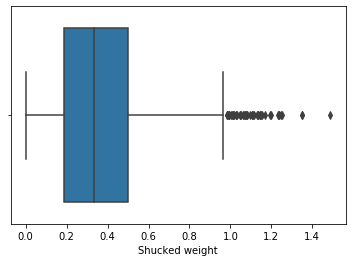

In [48]:
# Shucked weight
sns.boxplot(x = abalone['Shucked weight'],data= abalone)

In [49]:
# Outliers
Length_outliers = ((abalone['Shucked weight'] < (Q1['Shucked weight'] - 1.5 * IQR['Shucked weight'])) |(abalone['Shucked weight'] > (Q3['Shucked weight'] + 1.5 * IQR['Shucked weight'])))
positions_outliers = np.where(Length_outliers)
print(positions_outliers)

(array([ 165,  891, 1048, 1051, 1052, 1193, 1197, 1199, 1202, 1206, 1207,
       1209, 1416, 1417, 1425, 1426, 1526, 1527, 1748, 1749, 1753, 1755,
       1760, 1761, 1762, 1820, 1981, 2543, 2622, 2623, 2624, 2674, 2709,
       2809, 2810, 2861, 2862, 2969, 2971, 3006, 3081, 3426, 3598, 3712,
       3714, 3960, 3961, 3992], dtype=int64),)


In [50]:
# Lower Bound
lb = Q1['Shucked weight'] - 1.5 * IQR['Shucked weight']
print(lb)
# Upper Bound
ub = Q3['Shucked weight'] + 1.5 * IQR['Shucked weight']
print(ub)

-0.28737499999999994
0.975625


In [51]:
Shucked_weight = abalone['Shucked weight']
Shucked_weight_out_pos = Shucked_weight.iloc[positions_outliers]
# Assigning upper bound values to the outliers
Shucked_weight.iloc[positions_outliers]= ub

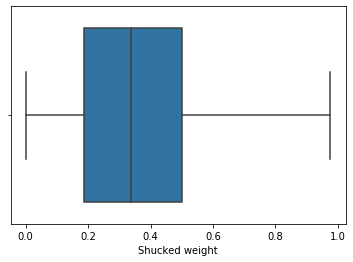

In [52]:
# Without Outliers
sns.boxplot(x = abalone['Shucked weight'],data= abalone)

### Viscera weight 

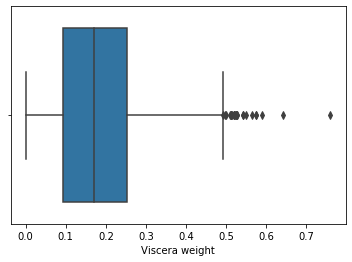

In [53]:
# Viscera weight
sns.boxplot(x = abalone['Viscera weight'],data= abalone)

In [54]:
# Outliers
Length_outliers = ((abalone['Viscera weight'] < (Q1['Viscera weight'] - 1.5 * IQR['Viscera weight'])) |(abalone['Viscera weight'] > (Q3['Viscera weight'] + 1.5 * IQR['Viscera weight'])))
positions_outliers = np.where(Length_outliers)
print(positions_outliers)

(array([ 170, 1048, 1052, 1204, 1206, 1207, 1209, 1421, 1426, 1749, 1756,
       1758, 1761, 1762, 2333, 2622, 2623, 2708, 2709, 2809, 2810, 2862,
       3426, 3627, 3714, 4146], dtype=int64),)


In [55]:
# Lower Bound
lb = Q1['Viscera weight'] - 1.5 * IQR['Viscera weight']
print(lb)
# Upper Bound
ub = Q3['Viscera weight'] + 1.5 * IQR['Viscera weight']
print(ub)

-0.14575000000000002
0.49225


In [56]:
Viscera_weight = abalone['Viscera weight']
Viscera_weight_out_pos = Viscera_weight.iloc[positions_outliers]
# Assigning upper bound values to the outliers
Viscera_weight.iloc[positions_outliers]= ub

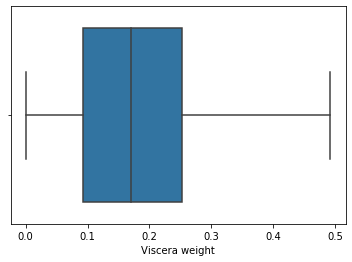

In [57]:
# Without Outliers
sns.boxplot(x = abalone['Viscera weight'],data= abalone)

### Shell weight

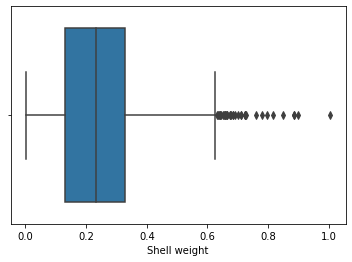

In [58]:
# Shell Weight
sns.boxplot(x = abalone['Shell weight'],data= abalone)

In [59]:
# Outliers
Length_outliers = ((abalone['Shell weight'] < (Q1['Shell weight'] - 1.5 * IQR['Shell weight'])) |(abalone['Shell weight'] > (Q3['Shell weight'] + 1.5 * IQR['Shell weight'])))
positions_outliers = np.where(Length_outliers)
print(positions_outliers)

(array([  81,  129,  157,  163,  164,  165,  166,  167,  168,  277,  334,
        358,  891, 1193, 1207, 1427, 1760, 1761, 1822, 1984, 2089, 2107,
       2156, 2160, 2207, 2273, 2367, 3007, 3147, 3148, 3150, 3187, 3714,
       3927, 4143], dtype=int64),)


In [60]:
# Lower Bound
lb = Q1['Shell weight'] - 1.5 * IQR['Shell weight']
print(lb)
# Upper Bound
ub = Q3['Shell weight'] + 1.5 * IQR['Shell weight']
print(ub)

-0.16812499999999997
0.626875


In [61]:
Shell_weight = abalone['Shell weight']
Shell_weight_out_pos = Shell_weight.iloc[positions_outliers]
# Assigning upper bound values to the outliers
Shell_weight.iloc[positions_outliers]= ub

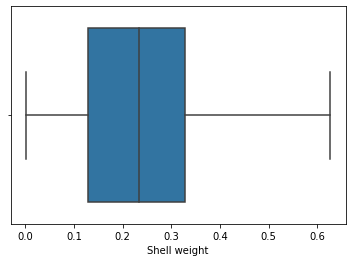

In [62]:
# Without Outliers
sns.boxplot(x = abalone['Shell weight'],data= abalone)

## Feature Engineering

#### Creating Dummy Variables for `Sex`  using One Hot Encoding

In [63]:
# Converting the 'Sex' categorical column into dummies
abalone_dummies = pd.get_dummies(abalone['Sex'], prefix = 'sex', prefix_sep = ':', drop_first= True)
abalone_dummies

,sex:I,sex:M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
4172,0,0
4173,0,1
4174,0,1
4175,0,0


In [64]:
# Concatenating the dummy variables with the original abalone dataset
abalone_new = pd.concat([abalone, abalone_dummies], axis = 1)
abalone_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 11 columns):
Sex               4175 non-null object
Length            4175 non-null float64
Diameter          4175 non-null float64
Height            4175 non-null float64
Whole weight      4175 non-null float64
Shucked weight    4175 non-null float64
Viscera weight    4175 non-null float64
Shell weight      4175 non-null float64
Rings             4175 non-null int64
sex:I             4175 non-null uint8
sex:M             4175 non-null uint8
dtypes: float64(7), int64(1), object(1), uint8(2)
memory usage: 494.3+ KB


In [65]:
# Checking the dimensions
abalone_new.shape

(4175, 11)

#### Creating a new Target Column with rings greater than 5 or not.

In [66]:
abalone_new['Rings:>5'] = np.where((abalone_new['Rings'] > 5), 1, 0)

In [67]:
abalone_new['Rings:>5'].value_counts()

1    3986
0     189
Name: Rings:>5, dtype: int64

## Train and  Test Split

In [68]:
# Assing the Independent and Dependent variables
X = abalone_new.drop(['Rings','Sex', 'Rings:>5'], axis = 1)
y = abalone_new['Rings:>5']

### Standardizing the dataset

In [69]:
from sklearn.preprocessing import StandardScaler
# Initailizing the StandardScalar
X_scaler = StandardScaler()
#Standardize all the feature columns
X_scaled = X_scaler.fit_transform(X)

In [70]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size=0.30, random_state=42 ,stratify = y)

In [71]:
# Train data (Dependent Variable)
train_y.value_counts()

1    2790
0     132
Name: Rings:>5, dtype: int64

In [72]:
# Test data (Dependent Variable)
test_y.value_counts()

1    1196
0      57
Name: Rings:>5, dtype: int64

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
# Intializing the model
logit = LogisticRegression()
# Fitting the model with X and Y values of the dataset
logit.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
# predictions 
pred_y = logit.predict(test_X)
# confusion matrix
from sklearn import metrics
# class with label 1(<5 rings) as row 1 and 0(>5 rings) as row 2
cm = metrics.confusion_matrix(test_y, pred_y)
print(cm)

[[  25   32]
 [   3 1193]]


In [75]:
# classification report
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        57
           1       0.97      1.00      0.99      1196

   micro avg       0.97      0.97      0.97      1253
   macro avg       0.93      0.72      0.79      1253
weighted avg       0.97      0.97      0.97      1253



In [76]:
# Accuracy
acc = metrics.accuracy_score(test_y,pred_y)
acc

0.9720670391061452

In [77]:
accuracies = {}
accuracies['Logistic Regression'] = acc
print(" Logistic Regression Algorithm Accuracy {:.2f}%".format(acc))

 Logistic Regression Algorithm Accuracy 0.97%


#### ROC -  AUC Curve

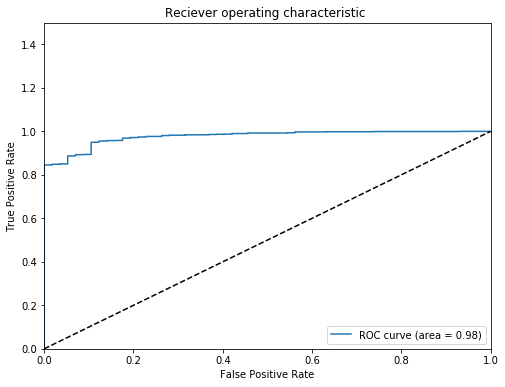

In [78]:
test_results_df = pd.DataFrame({'actual': test_y})
test_results_df = test_results_df.reset_index()
# predict the probabilities on the test set
predict_proba_df = pd.DataFrame(logit.predict_proba(test_X))
# selecting the probabilities that the test observation belongs to class 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
# Invoke roc_curve() to return fpr, tpr and threshold values
# Threshold values contain values from 0.0 to 1.0
fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual,
                                            test_results_df.chd_1,
                                            drop_intermediate = 
                                            False)
# Getting roc auc score by invoking metrics.roc_auc_score method
auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
# Setting the size of the plot
plt.figure(figsize = (8,6))
# Plotting the actual fpr and tpr values
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
# Plotting the diagonal line from (0,1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
# Setting the labels and titles
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic ')
plt.legend(loc='lower right')
plt.show()

In [79]:
# Logistic Regression Predictions to csv file
test_pred_logit = pd.DataFrame({'predicted':pred_y})
test_pred_logit.to_csv('logistic_predictions.csv')

### Support Vector Machines

In [80]:
# Fitting the SVM model on our train dataset
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

svc_model = SVC(kernel = 'linear')
svc_model.fit( train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [81]:
# Predicting the test data and evaluating it using confusion matrix
predict_y = svc_model.predict(test_X)
cm = confusion_matrix(test_y,predict_y)
cm

array([[  31,   26],
       [  10, 1186]], dtype=int64)

In [82]:
# Classification_report
print(classification_report(test_y,predict_y))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        57
           1       0.98      0.99      0.99      1196

   micro avg       0.97      0.97      0.97      1253
   macro avg       0.87      0.77      0.81      1253
weighted avg       0.97      0.97      0.97      1253



In [83]:
# Accuracy
print(accuracy_score(test_y,predict_y))

0.9712689545091779


#### Paramater Optimization using Cross-Validation 

In [84]:
# Tuning the parameters in to a 'param_grid'
param_grid = {'C': [0.1, 1, 10, 100]} 
# Importing 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svc_model,param_grid,verbose=4)

In [85]:
grid.fit(train_X, train_y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9548254620123203, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9548254620123203, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9548254620123203, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9763860369609856, total=   0.0s
[CV] C=1 .............................................................
[CV] ..................... C=1, score=0.971252566735113, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1 .............................................................
[CV] .................... C=1, score=0.9763860369609856, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.9774127310061602, total=   0.0s
[CV] C=10 ............................................................
[CV] .................... C=10, score=0.973305954825462, total=   0.0s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.9722792607802875, total=   0.0s
[CV] C=100 ...........................................................
[CV] .................. C=100, score=0.9784394250513347, total=   0.0s
[CV] C=100 ...........................................................
[CV] .................. C=100, score=0.9722792607802875, total=   0.0s
[CV] C=100 ...........................................................
[CV] ................... C=100, score=0.973305954825462, total=   0.0s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=4)

In [86]:
# Best estimator
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
# Best Parameters
grid.best_params_

{'C': 1}

In [88]:
# Predictions and Evaluation on test data
grid_predictions = grid.predict(test_X)
cm = confusion_matrix(test_y, grid_predictions)
cm

array([[  31,   26],
       [  10, 1186]], dtype=int64)

In [89]:
# Classification_report
print(classification_report(test_y, grid_predictions))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        57
           1       0.98      0.99      0.99      1196

   micro avg       0.97      0.97      0.97      1253
   macro avg       0.87      0.77      0.81      1253
weighted avg       0.97      0.97      0.97      1253



In [90]:
# Accuracy
print(accuracy_score(test_y, grid_predictions))

0.9712689545091779


In [91]:
# accuracy 
acc = metrics.accuracy_score(test_y, grid_predictions)
accuracies['SVM'] = acc
print("SVM Algorithm Accuracy Score : {:.2f}%".format(acc))

SVM Algorithm Accuracy Score : 0.97%


In [92]:
# SVM Predictions to csv file
test_pred_svm = pd.DataFrame({'predicted':grid_predictions})
test_pred_svm.to_csv('svm_predictions.csv')

### Conclusion

#### Both the models performed well but since this is a linear data so Logistic Regression model will be better to use over SVM.